In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
data = pd.read_csv('/content/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53571 entries, 0 to 53570
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    53571 non-null  int64  
 1   V1      53571 non-null  float64
 2   V2      53571 non-null  float64
 3   V3      53571 non-null  float64
 4   V4      53571 non-null  float64
 5   V5      53571 non-null  float64
 6   V6      53571 non-null  float64
 7   V7      53571 non-null  float64
 8   V8      53571 non-null  float64
 9   V9      53571 non-null  float64
 10  V10     53571 non-null  float64
 11  V11     53571 non-null  float64
 12  V12     53571 non-null  float64
 13  V13     53571 non-null  float64
 14  V14     53571 non-null  float64
 15  V15     53571 non-null  float64
 16  V16     53571 non-null  float64
 17  V17     53571 non-null  float64
 18  V18     53571 non-null  float64
 19  V19     53571 non-null  float64
 20  V20     53571 non-null  float64
 21  V21     53571 non-null  float64
 22

In [ ]:
data.isnull().values.any()

True

Text(0, 0.5, 'Frequency')

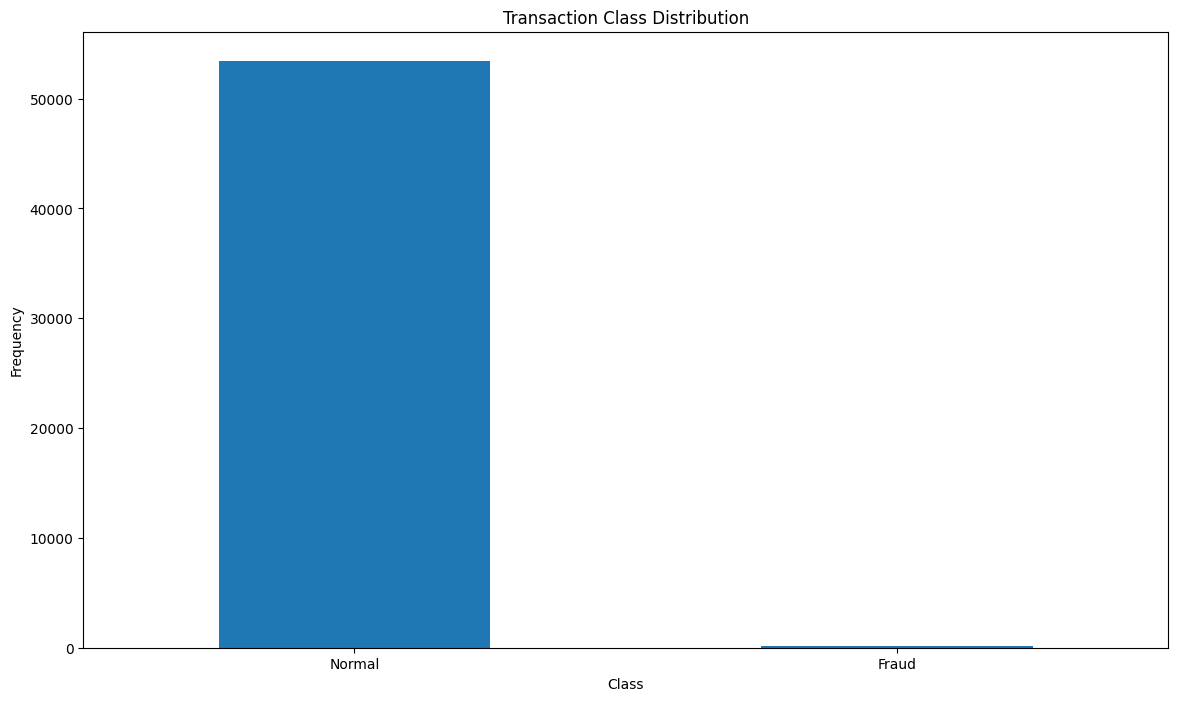

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(153, 31) (53417, 31)


In [ ]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     153.000000
mean       97.616013
std       230.026856
min         0.000000
25%         1.000000
50%         7.610000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    53417.000000
mean        94.251260
std        252.353693
min          0.000000
25%          7.680000
50%         25.520000
75%         86.650000
max      12910.930000
Name: Amount, dtype: float64

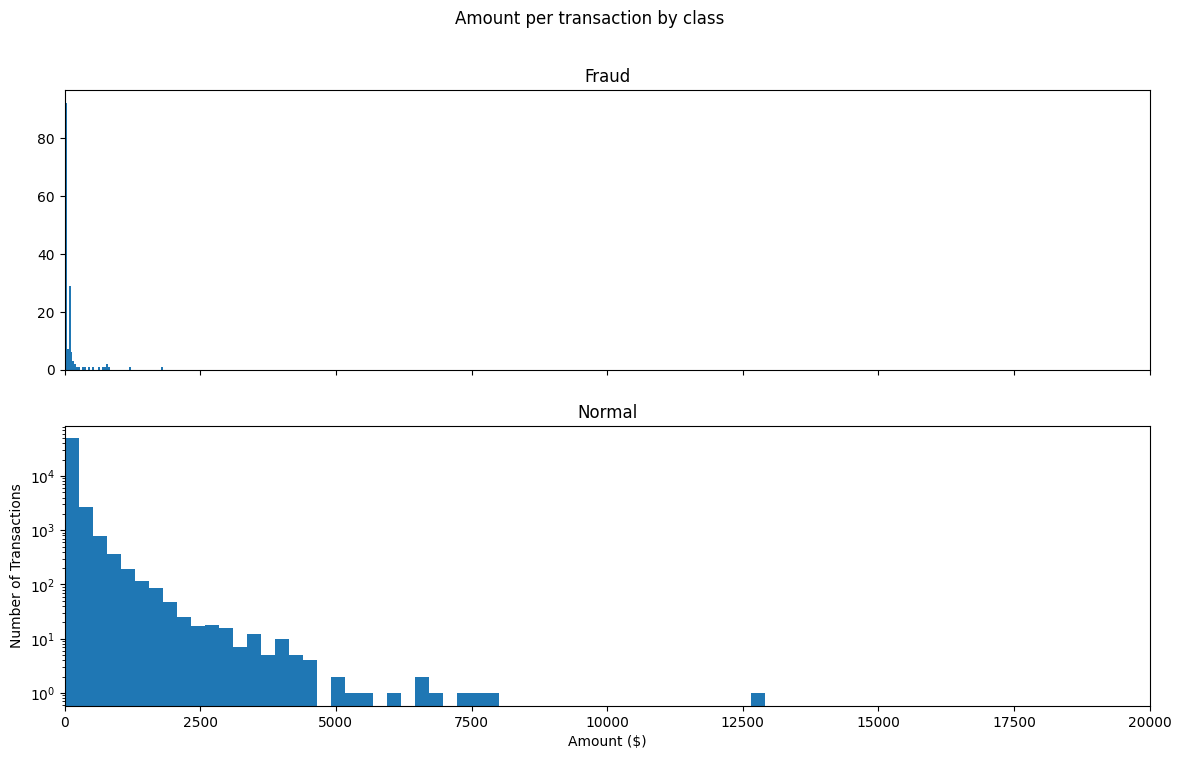

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

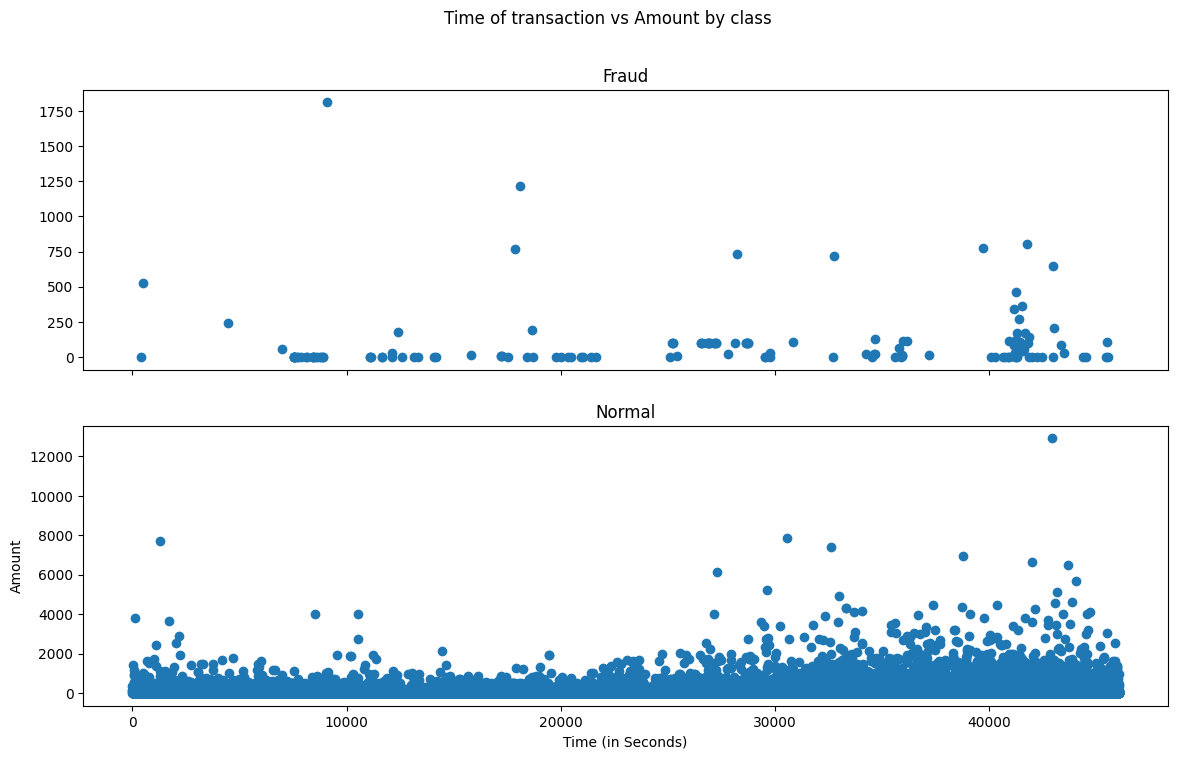

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
## Take some sample of the data

data1= data.sample(frac = 0.6,random_state=1)

data1.shape

(32143, 31)

In [ ]:
data.shape

(53571, 31)

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0027140004991265286
Fraud Cases : 87
Valid Cases : 32056


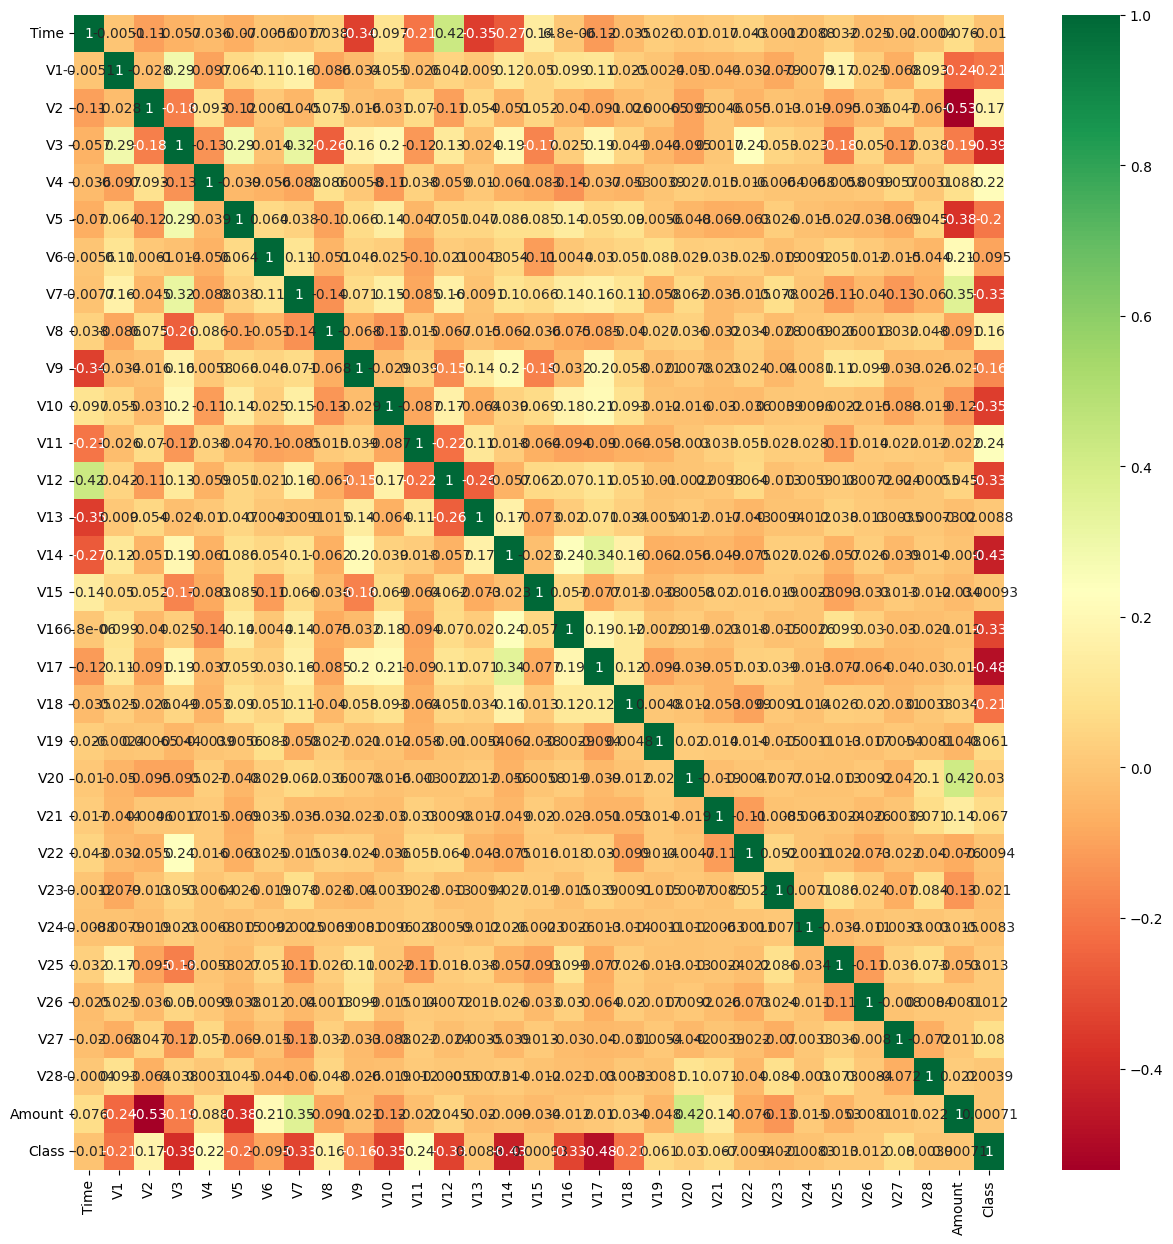

In [ ]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class", 'Time']]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
features = X
labels = Y

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(32143, 29)
(32143,)


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X, Y= ros.fit_resample(X, Y)
print(X.shape)
print(Y.shape)

(64112, 29)
(64112,)


In [ ]:
features = X
labels = Y


In [ ]:
f = []
n = []

for i in Y:
  if i == 1:
    f.append(i)
  else:
    n.append(i)

print(len(f), len(n))

32056 32056


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(44878, 29)
(44878,)
(9617, 29)
(9617,)


In [ ]:
f = []
n = []

for i in y_train:
  if i == 1:
    f.append(i)
  else:
    n.append(i)

print(len(f), len(n))

f = []
n = []

for i in y_test:
  if i == 1:
    f.append(i)
  else:
    n.append(i)

print(len(f), len(n))


22387 22491
4771 4846


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def get_confusion_matrix(test_y, test_yhat):
    cm = confusion_matrix(test_y, test_yhat)

    fig, ax = plt.subplots(1, 1,figsize=(10,10))

    tick_labels = ['Legitimate','Fraudulent']

    # calculate output
    total = np.sum(cm)
    tp = cm[0][0]
    fn = cm[0][1]
    fp = cm[1][0]
    tn = cm[1][1]
    tp_o = np.round((tp / total)*100,3)
    fn_o = np.round((fn / total)*100,3)
    fp_o = np.round((fp / total)*100,3)
    tn_o = np.round((tn / total)*100,3)
    tp_c = np.round(max((tp / (tp + fn)), 0.0)*100,3)
    fn_c = np.round(max((fn / (tp + fn)), 0.0)*100,3)
    fp_c = np.round(max((fp / (fp + tn)), 0.0)*100,3)
    tn_c = np.round(max((tn / (fp + tn)), 0.0)*100,3)
    labels = np.array([[
            f'TP\nCount: {tp}\nOverall: {tp_o}%\nTPR: {tp_c}%',
            f'FN (Type 2)\nCount: {fn}\nOverall: {fn_o}%\nFNR: {fn_c}%'
        ],[
            f'FP (Type 1)\nCount: {fp}\nOverall: {fp_o}%\nFPR: {fp_c}%',
            f'TN\nCount: {tn}\nOverall: {tn_o}%\nTNR: {tn_c}%'
        ]])
    sns.heatmap(cm, ax=ax, annot=labels, fmt='', cmap=plt.cm.RdYlBu)

    ax.set_title('Confusion Matrix', fontsize=14)

    ax.set_xticklabels(tick_labels, fontsize=14, rotation=0)
    ax.set_xlabel('Predicted', fontsize=20)
    ax.set_yticklabels(tick_labels, fontsize=14, rotation=0)
    ax.set_ylabel('Actual', fontsize=20)
    plt.show()



In [ ]:
model = IsolationForest(n_estimators=50, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_iforest.py:307: UserWarning: max_samples (64112) is greater than the total number of samples (44878). max_samples will be set to n_samples for estimation.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0027140004991265286, max_samples=64112,
                n_estimators=50,
                random_state=RandomState(MT19937) at 0x7A6FBB9CEA40)

In [ ]:
def predict(X):
    test_yhat = model.predict(X)
    # values are -1 and 1 (-1 for outliers and 1 for inliers), thus we will map it to 0 (inlier) and 1 (outlier) as this is our target variable
    test_yhat = np.array([1 if y == -1 else 0 for y in test_yhat])
    return test_yhat

y_pred = predict(X_test)
isolation = (accuracy_score(y_test,y_pred))
print(f'Accuracy For IsolationForest model :', isolation*100 ,'%\n')
print(f'Classification report :\n',classification_report(y_test,y_pred))

Accuracy For IsolationForest model : 50.150774669855466 %

Classification report :
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4846
         1.0       0.00      0.00      0.00      4771

    accuracy                           0.50      9617
   macro avg       0.25      0.50      0.33      9617
weighted avg       0.25      0.50      0.34      9617



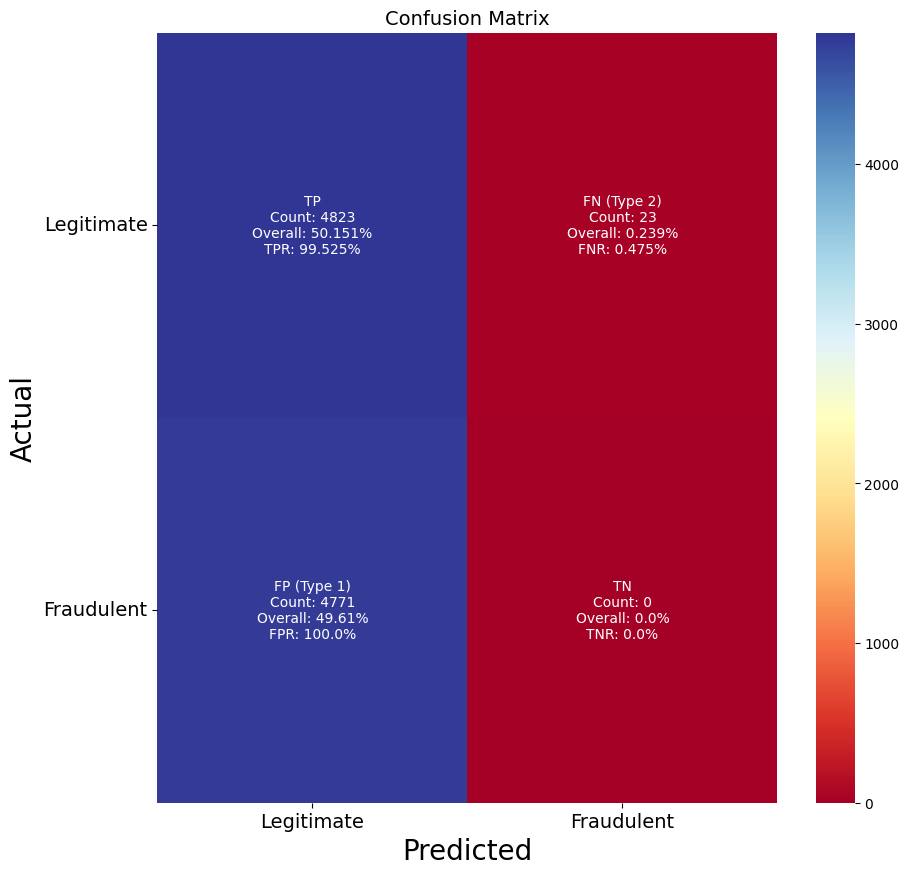

In [ ]:
get_confusion_matrix(y_test, y_pred)

In [ ]:
model = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
model.fit(X_train, y_train)

LocalOutlierFactor(contamination=0.0027140004991265286)

In [ ]:
def predict(X):
    test_yhat = model.fit_predict(X)
    # values are -1 and 1 (-1 for outliers and 1 for inliers), thus we will map it to 0 (inlier) and 1 (outlier) as this is our target variable
    test_yhat = np.array([1 if y == -1 else 0 for y in test_yhat])
    return test_yhat

y_pred = predict(X_test)

local = (accuracy_score(y_test,y_pred))
print(f'Accuracy For LocalOutlierFactor model :', local*100,'%\n')
print(f'Classification report :\n',classification_report(y_test,y_pred))

Accuracy For LocalOutlierFactor model : 50.109181657481535 %

Classification report :
               precision    recall  f1-score   support

         0.0       0.50      0.99      0.67      4846
         1.0       0.00      0.00      0.00      4771

    accuracy                           0.50      9617
   macro avg       0.25      0.50      0.33      9617
weighted avg       0.25      0.50      0.34      9617



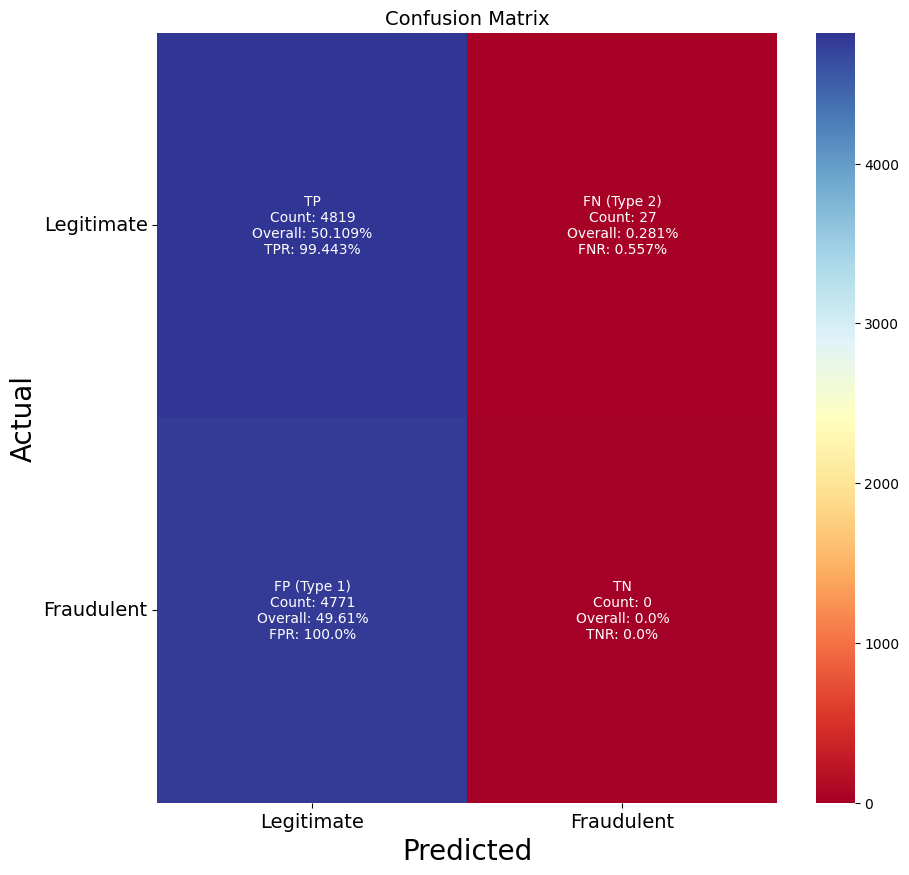

In [ ]:
get_confusion_matrix(y_test, y_pred)

In [ ]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model = XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

xgb = (accuracy_score(y_test,y_pred))
print(f'Accuracy For XGBClassifier model :', xgb*100,' %\n')
print(f'Classification report :\n',classification_report(y_test,y_pred))

Accuracy For XGBClassifier model : 99.96880524071956  %

Classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4846
         1.0       1.00      1.00      1.00      4771

    accuracy                           1.00      9617
   macro avg       1.00      1.00      1.00      9617
weighted avg       1.00      1.00      1.00      9617



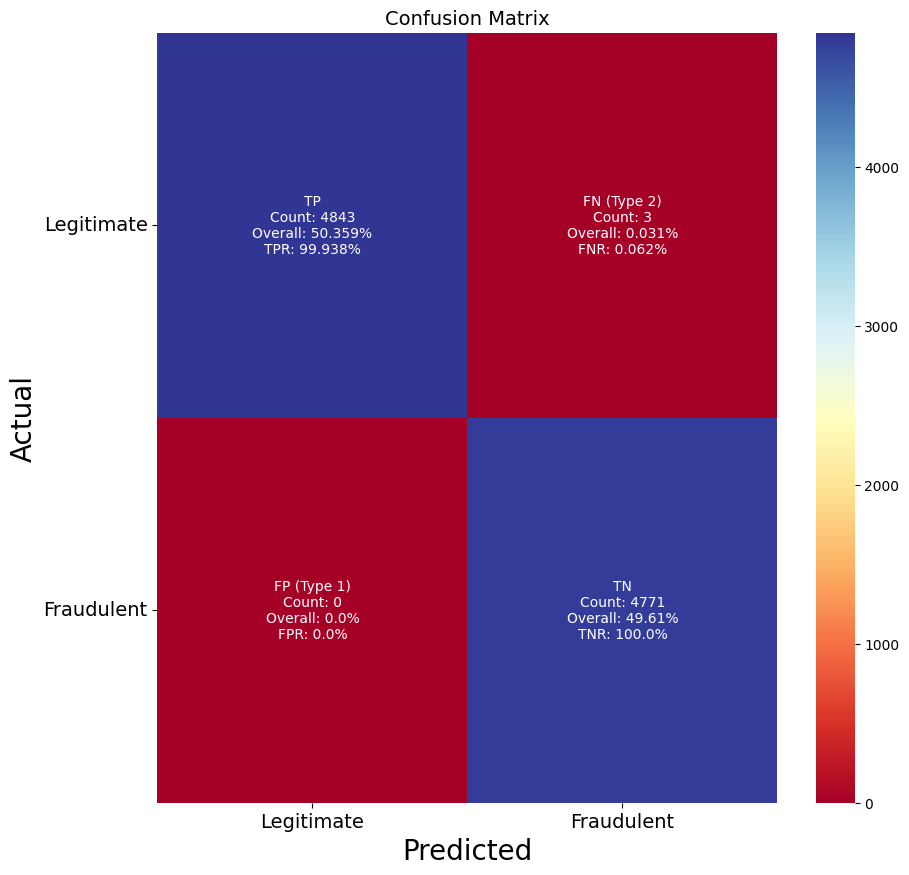

In [ ]:
get_confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

logistic = (accuracy_score(y_test,y_pred))
print(f'Accuracy For Logistic Regression model :', logistic*100,' %\n')
print(f'Classification report :\n',classification_report(y_test,y_pred))

Accuracy For Logistic Regression model : 97.47322449828428  %

Classification report :
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      4846
         1.0       0.99      0.96      0.97      4771

    accuracy                           0.97      9617
   macro avg       0.98      0.97      0.97      9617
weighted avg       0.97      0.97      0.97      9617



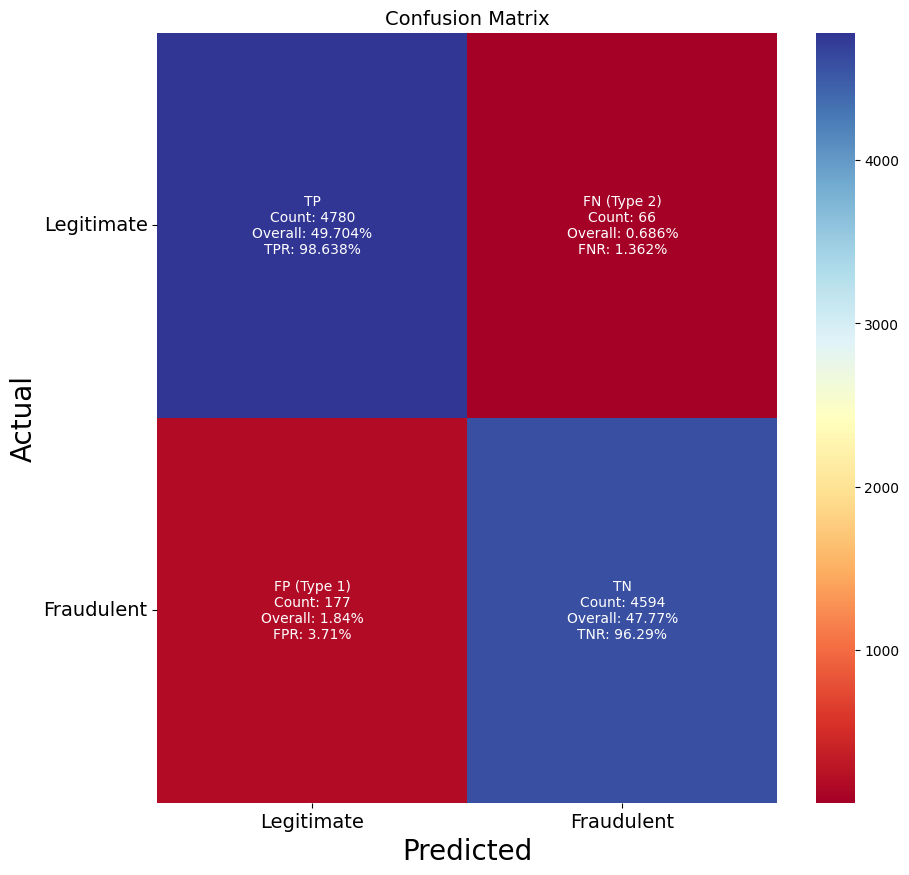

In [ ]:
get_confusion_matrix(y_test, y_pred)

In [ ]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

num_round = 100
model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

y_pred = model.predict(X_test)



[LightGBM] [Info] Number of positive: 22387, number of negative: 22491
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7381
[LightGBM] [Info] Number of data points in the train set: 44878, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498841 -> initscore=-0.004635
[LightGBM] [Info] Start training from score -0.004635


In [ ]:
y_pred = np.round(y_pred)
print(y_pred[0])

lgb = (accuracy_score(y_test,y_pred))
print(f'Accuracy For LightGBM model :', lgb*100,' %\n')
print(f'Classification report :\n',classification_report(y_test,y_pred))

0.0
Accuracy For LightGBM model : 99.96880524071956  %

Classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4846
         1.0       1.00      1.00      1.00      4771

    accuracy                           1.00      9617
   macro avg       1.00      1.00      1.00      9617
weighted avg       1.00      1.00      1.00      9617



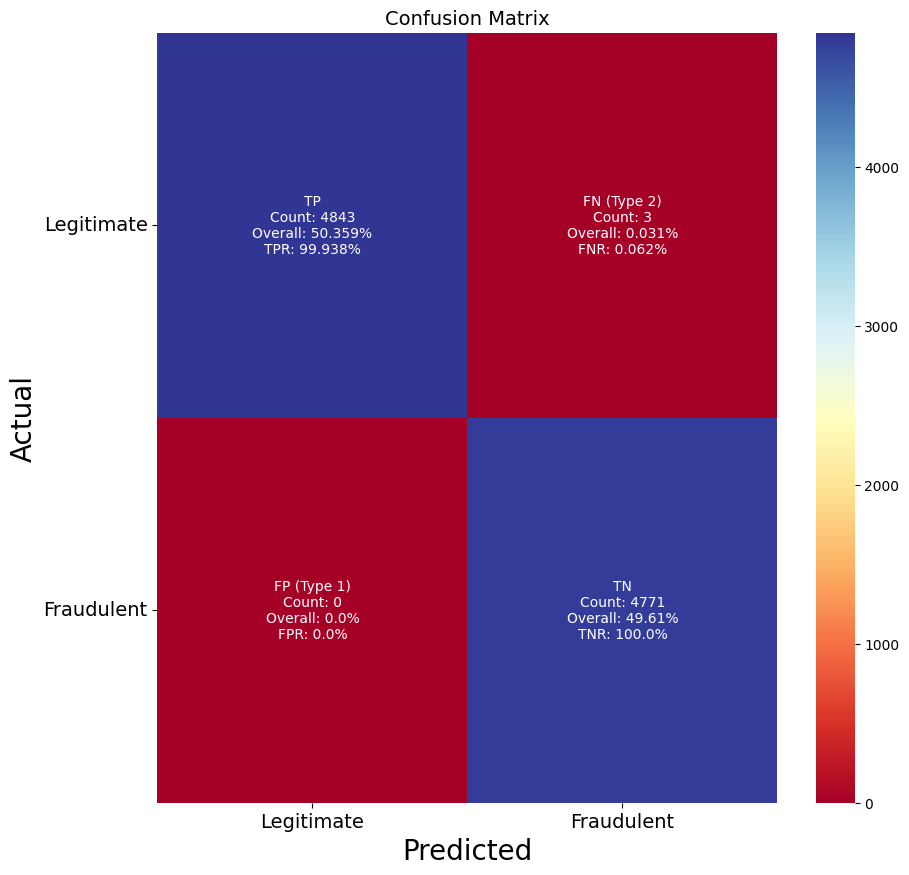

In [ ]:
get_confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [ ]:
knn = (accuracy_score(y_test,y_pred))
print(f'Accuracy For KNN model :', knn*100,' %\n')
print(f'Classification report :\n',classification_report(y_test,y_pred))

Accuracy For KNN model : 99.95840698762608  %

Classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4846
         1.0       1.00      1.00      1.00      4771

    accuracy                           1.00      9617
   macro avg       1.00      1.00      1.00      9617
weighted avg       1.00      1.00      1.00      9617



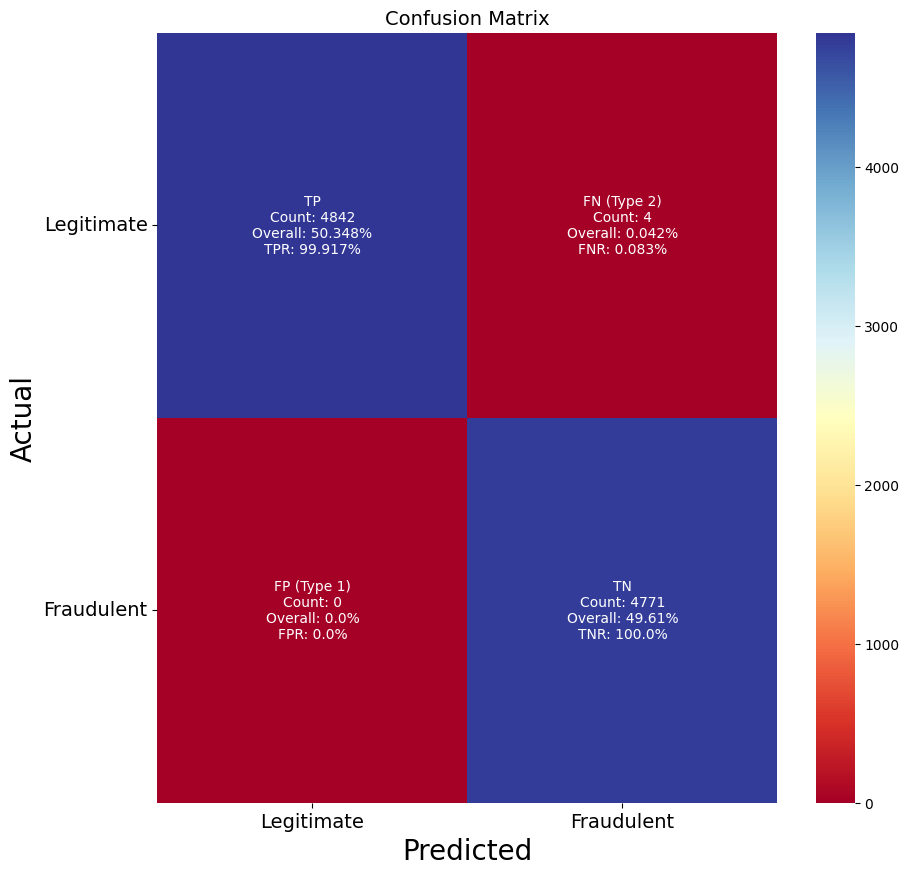

In [ ]:
get_confusion_matrix(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual accuracy values for each model
model_names = ['IsolationForest', 'LocalOutlierFactor', 'Logistic Regression', 'XGBClassifier',  'LGBM', 'KNN']
accuracies = [isolation,local, logistic, xgb, lgb, knn]

# Create a bar chart
plt.bar(model_names, accuracies, color=['blue', 'green', 'grey','red', 'orange', 'black'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy}', ha='center')

# Show the plot
plt.show()


NameError: ignored